### Time Series analysis using FBProphet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet

In [2]:
df=pd.read_csv("Milk Production.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [3]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


<AxesSubplot:>

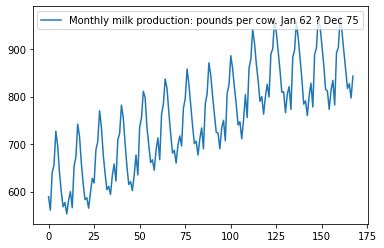

In [4]:
df.plot()

In [5]:
df.columns = ["ds","y"]

In [6]:
df.head()

,ds,y
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [7]:
df["ds"] = pd.to_datetime(df["ds"])

In [8]:
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


<AxesSubplot:>

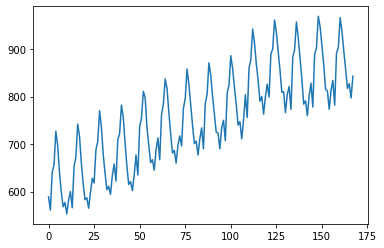

In [9]:
df["y"].plot()

In [10]:
## To make the variance constant we need to perform this.
## We can do dicky fuller test to check the p-value.

# df['y'] = df['y']-df['y'].shift(1)

In [11]:
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


<AxesSubplot:>

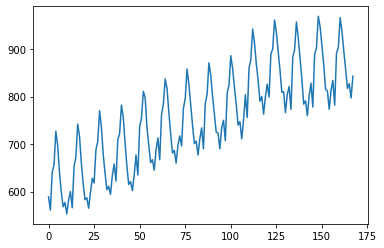

In [12]:
df['y'].plot()

In [13]:
from fbprophet import Prophet

In [14]:
# Initialize the model

model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
## Create future dates for prediction
future_dates = model.make_future_dataframe(periods = 365)

In [16]:
## Prediction of result
prediction = model.predict(future_dates)

In [17]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,577.412819,596.318415,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,535.238567,555.781606,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,631.023847,650.754476,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,648.218174,668.514939,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,710.721162,730.974451,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [18]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.561801,804.610529,826.758058
529,1976-11-27,818.770979,808.002284,829.578110
530,1976-11-28,822.159021,811.664442,832.551290
531,1976-11-29,825.663235,814.712043,835.829932
532,1976-11-30,829.213819,817.429551,840.394675


#### Plotting the Forecasts
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

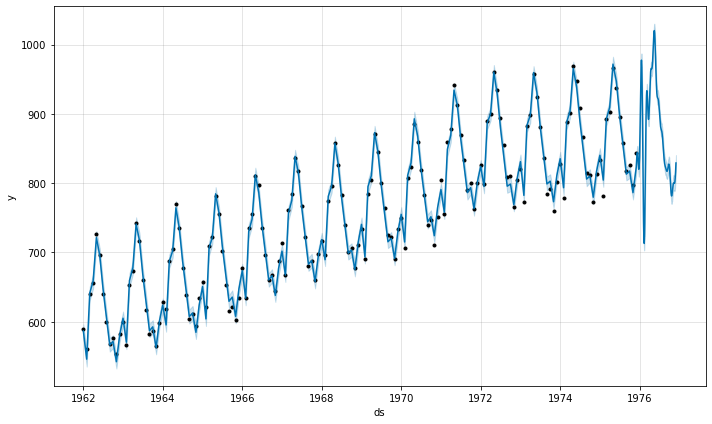

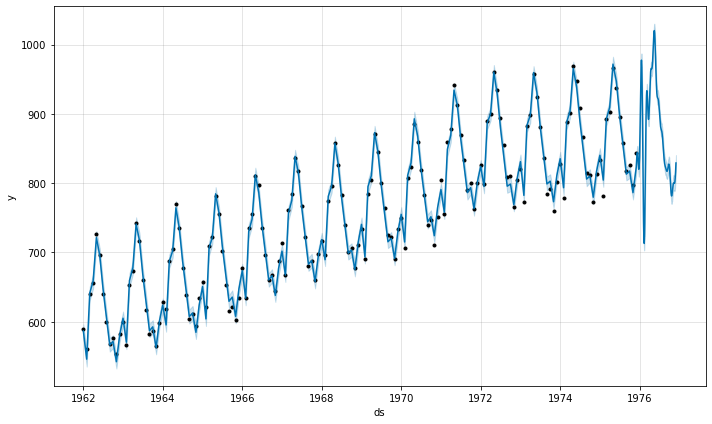

In [19]:
### plotting the prediction
model.plot(prediction)

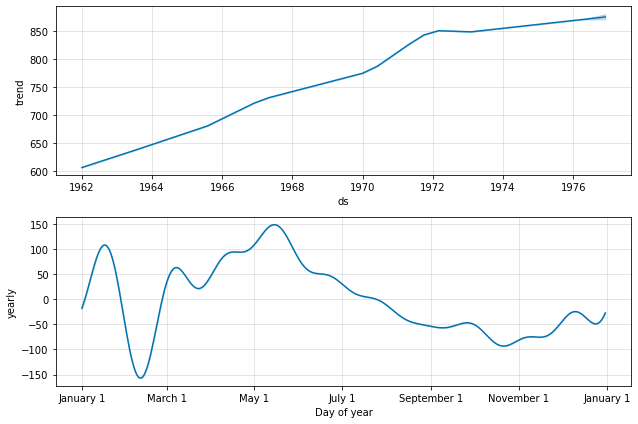

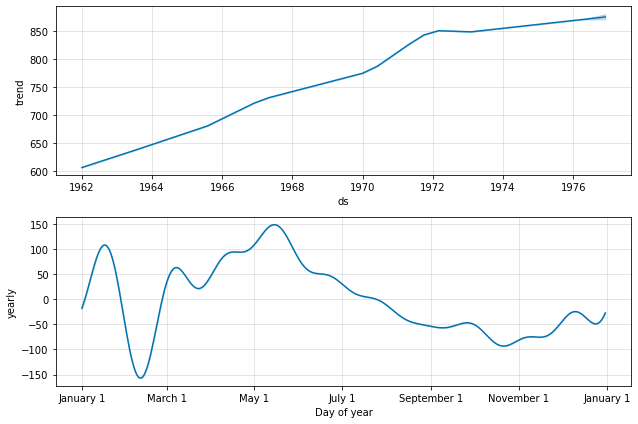

In [20]:
# Visualize each components [Trends]

model.plot_components(prediction)

#### Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [21]:
##Cross Validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon='365 days', period = "180 days", initial = "1095 days")

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [22]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,629.706391,627.488083,631.520078,622,1965-01-22
1,1965-03-01,712.739970,706.011715,718.235858,709,1965-01-22
2,1965-04-01,731.118164,718.474067,743.247860,722,1965-01-22
3,1965-05-01,800.091760,780.594746,820.186545,782,1965-01-22
4,1965-06-01,768.349331,741.275450,797.795760,756,1965-01-22


#### Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [23]:
from fbprophet.diagnostics import performance_metrics
df_per = performance_metrics(df_cv)
df_per.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.36
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.36
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.36
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.36
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.36


In [24]:
df_per

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.36
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.36
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.36
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.36
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.36
...,...,...,...,...,...,...,...
180,357 days,876.440065,29.604730,22.376918,0.028112,0.018389,0.36
181,360 days,683.253431,26.139117,19.320390,0.023951,0.017203,0.40
182,361 days,670.162569,25.887498,18.912627,0.023537,0.014779,0.40
183,362 days,652.884471,25.551604,18.184354,0.022704,0.013880,0.44


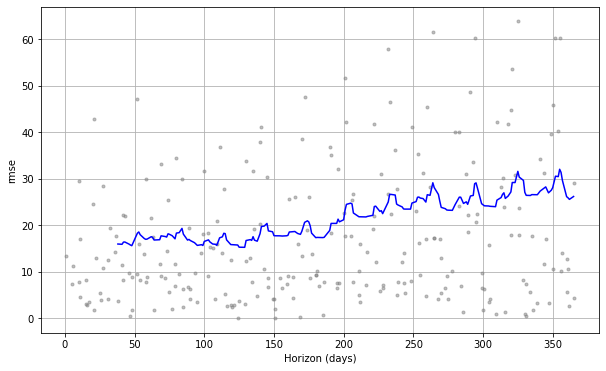

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')